## Clustering - K-Means

<strong> Clustering - K-Means </strong>
<ul style="list-style-type:square">
  <li>Features :BODY, DOORS, HP, MPG,RPM </li>
  <li>Model : K-means </li>
      <li>Goal : Clustering the cars according to similarity</li>
</ul>

In [1]:
#Spark Session
spSession = SparkSession.builder.master("local").appName("kMean").config("some.config").getOrCreate()

In [2]:
#Libraries
import math
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
# Import CSV file and Store the rdd in cache
carRDD = sc.textFile("car2.csv")
carRDD.cache()

car2.csv MapPartitionsRDD[1] at textFile at <unknown>:0

In [4]:
carRDD.collect()

['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389',
 'honda,gas,std,two,hatchback,fwd,four,60,5500,38,42,5399',
 'nissan,gas,std,two,sedan,fwd,four,69,5200,31,37,5499',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'plymouth,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,31,38,6095',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,31,38,6189',
 'dodge,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'plymouth,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'chevrolet,gas,std,two,hatchback,fwd,four,70,5400,38,43,6295',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,31,3

In [5]:
# Remove header
header = carRDD.first()
carRDD2 = carRDD.filter(lambda x : x not in header)
carRDD2.take(2)

['subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151']

In [6]:
# Set numeric label and create row objects
def transformToNumeric(inputStr):
    # Split columns
    attList = inputStr.split(",")
    
    # Numeric Label
    doors = 1.0 if attList[3] == "two" else 2.0
    body = 1.0 if attList[4] == "sedan" else 2.0
    
    # row object
    row = Row( DOORS = doors, BODY = body, HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return row

In [7]:
carRDD3 = carRDD2.map(transformToNumeric)
carRDD3.persist()
carRDD3.take(3)

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RPM=5000.0)]

In [8]:
# Create DF
carDF = spSession.createDataFrame(carRDD3)
carDF.show()

+----+-----+----+----+------+
|BODY|DOORS|  HP| MPG|   RPM|
+----+-----+----+----+------+
| 2.0|  1.0|69.0|31.0|4900.0|
| 2.0|  1.0|48.0|47.0|5100.0|
| 2.0|  1.0|68.0|30.0|5000.0|
| 2.0|  1.0|62.0|35.0|4800.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|60.0|38.0|5500.0|
| 1.0|  1.0|69.0|31.0|5200.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|31.0|5000.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  1.0|70.0|38.0|5400.0|
| 2.0|  1.0|62.0|31.0|4800.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  1.0|58.0|49.0|4800.0|
| 2.0|  2.0|62.0|31.0|4800.0|
| 2.0|  1.0|76.0|30.0|6000.0|
| 1.0|  2.0|70.0|38.0|5400.0|
+----+-----+----+----+------+
only showing top 20 rows



In [9]:
# Convert the spark dataframe into a pandas dataframe
stats = carDF.describe().toPandas()
stats.head()

,summary,BODY,DOORS,HP,MPG,RPM
0,count,197,197,197,197,197
1,mean,1.532994923857868,1.5685279187817258,103.60406091370558,25.15228426395939,5118.0203045685275
2,stddev,0.5001812579359883,0.49654352778167493,37.639205349518356,6.437862917085915,481.03591405011446
3,min,1.0,1.0,48.0,13.0,4150.0
4,max,2.0,2.0,262.0,49.0,6600.0


In [10]:
# list with mean and std
mean = stats.iloc[1,1:6].values.tolist()
std = stats.iloc[2,1:6].values.tolist()

In [11]:
mean

['1.532994923857868',
 '1.5685279187817258',
 '103.60406091370558',
 '25.15228426395939',
 '5118.0203045685275']

In [12]:
std

['0.5001812579359883',
 '0.49654352778167493',
 '37.639205349518356',
 '6.437862917085915',
 '481.03591405011446']

In [13]:
# Set mean and std as broadcast variables
bc_mean = sc.broadcast(mean)
bc_std = sc.broadcast(std)

In [14]:
# Data scaling
def centerAndScale(row):
    global bc_mean
    global bc_std
    
    meanArray = bc_mean.value
    stdArray = bc_std.value
    
    Array = list()
    
    for i in range(len(meanArray)):
        Array.append( (float(row[i]) - float(meanArray[i])) /float(stdArray[i]))
        
    return Vectors.dense(Array)

In [15]:
carRDD4 = carDF.rdd.map(centerAndScale)
carRDD4.collect()[:10]

[DenseVector([0.9337, -1.145, -0.9194, 0.9083, -0.4532]),
 DenseVector([0.9337, -1.145, -1.4773, 3.3936, -0.0375]),
 DenseVector([0.9337, -1.145, -0.9459, 0.753, -0.2453]),
 DenseVector([0.9337, -1.145, -1.1053, 1.5297, -0.6611]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]),
 DenseVector([0.9337, -1.145, -1.1585, 1.9956, 0.7941]),
 DenseVector([-1.0656, -1.145, -0.9194, 0.9083, 0.1704]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083, -0.2453])]

In [24]:
# Transform into a dataframe
carRDD5 = carRDD4.map(lambda f : Row(features = f))
carDF = spSession.createDataFrame(carRDD5)
carDF.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[-1.0656035495158...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
+--------------------+
only showing top 10 rows



In [42]:
# Create Model
kmeans = KMeans( k = 3 , seed = 1)
model = kmeans.fit(carDF)

In [43]:
#Predictions
predictions = model.transform(carDF)
predictions.collect()

[Row(features=DenseVector([0.9337, -1.145, -0.9194, 0.9083, -0.4532]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -1.4773, 3.3936, -0.0375]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 0.753, -0.2453]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -1.1053, 1.5297, -0.6611]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -1.1585, 1.9956, 0.7941]), prediction=0),
 Row(features=DenseVector([-1.0656, -1.145, -0.9194, 0.9083, 0.1704]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 1.8403, 0.7941]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 0.9083, -0.2453]), prediction=0),
 Row(features=DenseVector([0.9337, -1.145, -0.9459, 0.9083, 0.7941]), prediction=0),
 Row(features=DenseVector([0.9337, 0.869, -0.9459, 0.9083, 0

In [44]:
# Separate features and prediction (group)
def unstripData(instr) :
    return (instr["prediction"], instr["features"][0], instr["features"][1], instr["features"][2], instr["features"][3],instr["features"][4])

In [45]:
carRDD6 = predictions.rdd.map(unstripData)
predList = carRDD6.collect()
predPd = pd.DataFrame(predList)

In [50]:
predPd[:10]

,0,1,2,3,4,5
0,0,0.933672,-1.144971,-0.919362,0.908332,-0.453231
1,0,0.933672,-1.144971,-1.477291,3.393629,-0.037461
2,0,0.933672,-1.144971,-0.945930,0.753001,-0.245346
3,0,0.933672,-1.144971,-1.105338,1.529656,-0.661116
4,0,0.933672,-1.144971,-0.945930,1.840318,0.794077
5,0,0.933672,-1.144971,-1.158475,1.995649,0.794077
6,0,-1.065604,-1.144971,-0.919362,0.908332,0.170423
7,0,0.933672,-1.144971,-0.945930,1.840318,0.794077
8,0,0.933672,-1.144971,-0.945930,1.840318,0.794077
9,0,0.933672,-1.144971,-0.945930,0.908332,-0.245346


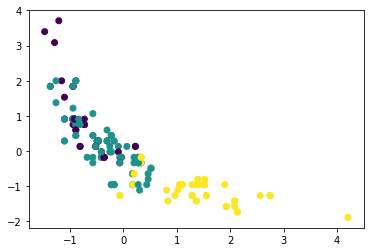

In [59]:
# Gráfico com o resultados dos clusters criados
plt.cla()
plt.scatter(predPd[3], predPd[4],  c = predPd[0])